# ANN Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf



In [2]:
df = pd.read_excel("housing_data.xlsx",)
df.head()

X = df[["LSTAT"]].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [3]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(1,)),
        tf.keras.layers.Dense(units=16, activation="sigmoid", name="hidden1"),
        tf.keras.layers.Dense(units=16, activation="sigmoid", name="hidden2"),
        tf.keras.layers.Dense(units=1, name="output"),
    ]
)

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mse", metrics=["mse"]
)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 16)                32        
_________________________________________________________________
hidden2 (Dense)              (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [4]:
tf_fit = model.fit(
    x=X_train_std, y=y_train, batch_size=16, validation_split=0.1, epochs=200, verbose=1
)



Epoch 1/200
20/20 [==============================] - 1s 14ms/step - loss: 493.1168 - mse: 493.1168 - val_loss: 385.9196 - val_mse: 385.9196
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 353.6833 - mse: 353.6833 - val_loss: 270.4787 - val_mse: 270.4787
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 257.2497 - mse: 257.2497 - val_loss: 188.1217 - val_mse: 188.1217
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 189.8631 - mse: 189.8631 - val_loss: 134.6125 - val_mse: 134.6125
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 147.0947 - mse: 147.0947 - val_loss: 100.9634 - val_mse: 100.9634
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 119.9705 - mse: 119.9705 - val_loss: 80.5027 - val_mse: 80.5027
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 103.4492 - mse: 103.4492 - val_loss: 67.1809 - val_mse: 67.1809
Epoch 8/200
20/20 [===========

In [5]:
y_train_pred = model(X_train_std)
y_test_pred = model(X_test_std)


In [6]:
def reg_plot(ax, X, y, y_pred, title, color="steelblue"):
    ax.scatter(X, y, c=color, edgecolor="white", s=70)
    ax.plot(X, y_pred, color="black", lw=2)
    ax.set_title(title)
    return


def res_plot(ax, y_pred, y, title, color="steelblue"):
    ax.scatter(y_pred, y_pred - y, c=color, marker="o", edgecolor="white", s=70)
    ax.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
    ax.axes.set_aspect("equal")
    ax.set_title(title)


def store_results(df, model_name, y_train, y_test, y_train_pred, y_test_pred):

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)

    data = {
        "Model": model_name,
        "MSE Train": [MSE_train],
        "MSE Test": [MSE_test],
        "R2 Train": [R2_train],
        "R2 Test": [R2_test],
    }
    dft = pd.DataFrame(data=data)
    return df.append(dft, ignore_index=True)


In [7]:
def run_model_ANN(
    model, model_name, X_train, X_train_std, y_train, X_test, X_test_std, y_test, df
):

    y_train_pred = model(X_train_std).numpy().ravel()
    y_test_pred = model(X_test_std).numpy().ravel()

    # Indices for sorting during plotting
    idx_train = np.argsort(X_train_std, axis=0).ravel()
    idx_test = np.argsort(X_test_std, axis=0).ravel()

    fig, ax = plt.subplots(
        1, 2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True
    )
    reg_plot(
        ax=ax[0],
        X=X_train[idx_train, :1],
        y=y_train[idx_train],
        y_pred=y_train_pred[idx_train],
        title="Train",
    )
    reg_plot(
        ax=ax[1],
        X=X_test[idx_test, :1],
        y=y_test[idx_test],
        y_pred=y_test_pred[idx_test],
        title="test",
        color="limegreen",
    )
    fig.supxlabel("Lower status of the population [LSTAT]")
    fig.supylabel("Median value of homes in $1000s [MEDV]")

    fig, ax = plt.subplots(
        1, 2, figsize=(9, 5), constrained_layout=True, sharex=True, sharey=True
    )
    res_plot(ax=ax[0], y_pred=y_train_pred, y=y_train, title="Train")
    res_plot(ax=ax[1], y_pred=y_test_pred, y=y_test, title="Test", color="limegreen")
    fig.supxlabel("Predicted values")
    fig.supylabel("Residual")

    df = store_results(
        df=df,
        model_name=model_name,
        y_train=y_train,
        y_train_pred=y_train_pred,
        y_test=y_test,
        y_test_pred=y_test_pred,
    )

    return df


C:\Users\nnnpo\AppData\Local\Temp\ipykernel_24964\3452113440.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(dft, ignore_index=True)


,Model,MSE Train,MSE Test,R2 Train,R2 Test
0,ANN,25.599038,29.02904,0.697998,0.651368


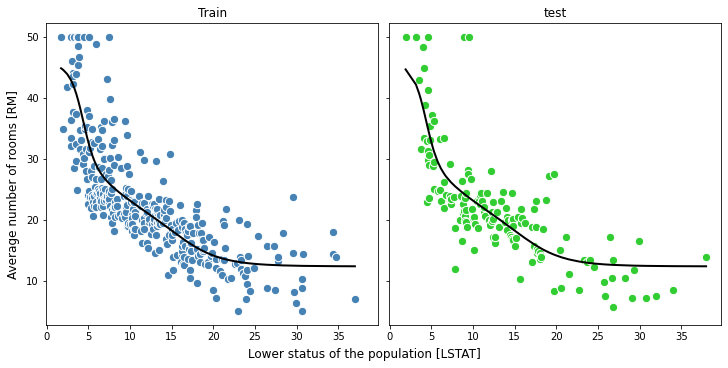

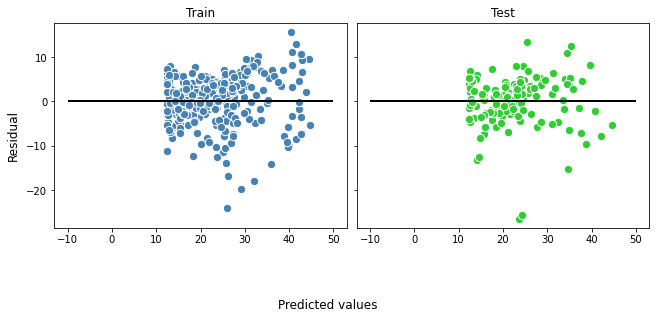

In [8]:
dfAll = pd.DataFrame()
dfAll = run_model_ANN(
    model=model,
    model_name=f"ANN",
    X_train=X_train,
    X_train_std=X_train_std,
    y_train=y_train,
    X_test=X_test,
    X_test_std=X_test_std,
    y_test=y_test,
    df=dfAll,
)

display(dfAll)
